# TO BE UPDATED: NYC Taxi Trip Records Analysis Using Machine Learning algrithms

“Cities are not born smart. They become smart by understanding what is happening on their streets.” – New York City Taxi and Limousine Commission (TLC).

TLC is an agency of the New York City government that licenses and regulates the medallion taxis and for-hire vehicle industries, including app-based companies. Therefore, major trends in the taxi and for-hire vehicle industry are highlighted in TLC records and they are public available.

* What transportation data does TLC collect?

* Why collects data?

To understand traffic patterns, working conditions, vehicle efficiency, service availability, distinguish new business opportunities… 


## 1) About the data

* The data set is publically available for free on NYC.gov
* I was living in NYC for some time during my internship and visited for a few times, and took taxi for sure. However, I never think about Taxi in terms of Trip Records. The research is interesting to me and I would like to introduce the result to my NYC friends next time.
* The data set is huge:
    - It has 666376 rows and 19 columns, including all of the information about Taxi

## 2) Link to the data set
* NYC Taxi Limousine trip record data URL: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* To download the data set: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-08.csv

In [42]:
# Enter link here.
nyc_gov_link = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
green_tripdata_download = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2018-08.csv"

## 3) Import the data
List the total rows and columns

In [43]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from scipy import stats
import matplotlib.pyplot as plt

# The dateset is 59MB, I downloaded to my local laptop to speed up.
url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2018-08.csv"

data = pd.read_csv(url)

# Report how many rows and columns of data you have loaded.
print("There are",data.shape[0],"rows and",data.shape[1],"columns.")

There are 666376 rows and 19 columns.


## 4) Show the head of the data set

In [44]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-08-01 00:03:22,2018-08-01 00:17:59,N,1,255,49,1,3.54,13.5,0.5,0.5,2.96,0.0,NaN,0.3,17.76,1,1
1,2,2018-08-01 00:37:08,2018-08-01 00:46:53,N,1,256,112,1,1.94,8.5,0.5,0.5,1.96,0.0,NaN,0.3,11.76,1,1
2,2,2018-08-01 00:12:45,2018-08-01 00:20:21,N,1,146,7,2,1.37,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1
3,2,2018-08-01 00:21:29,2018-08-01 00:27:41,N,1,7,260,2,1.10,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
4,2,2018-08-01 00:03:24,2018-08-01 00:06:44,N,1,256,256,1,0.56,4.5,0.5,0.5,1.74,0.0,NaN,0.3,7.54,1,1


## 5) Show me the shape of your data
* Size of the Data Set
* Shape of the Data Set
* Data Types of the Data Set

In [45]:
# data.size 
size = data.size 
  
# data.shape 
shape = data.shape 
  
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}\n". 
      format(size, shape, shape[0]*shape[1])) 

# data.dtypes
dtypes = data.dtypes
print("data types\n{}\n". 
      format(dtypes))

Size = 12661144
Shape =(666376, 19)
Shape[0] x Shape[1] = 12661144

data types
VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                  int64
dtype: object



In [46]:
data_pie_percentage = data.groupby('passenger_count').count()['VendorID']
print(data_pie_percentage)

passenger_count
0       851
1    565196
2     52253
3     10355
4      3605
5     21911
6     12187
7        10
8         6
9         2
Name: VendorID, dtype: int64


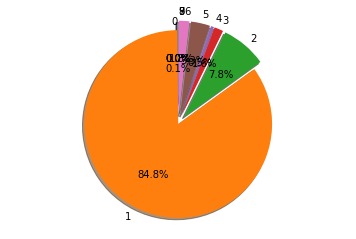

In [47]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_percentage
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [48]:
data_pie_total_amount = data.groupby('passenger_count').mean()['fare_amount']

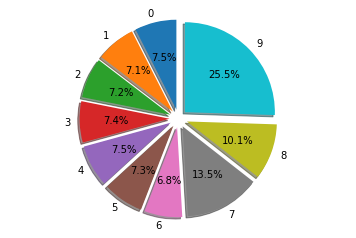

In [49]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_total_amount
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [50]:
data_pie_trip_distance = data.groupby('passenger_count').mean()['trip_distance']

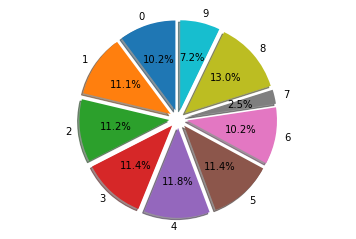

In [51]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_trip_distance
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 6) Show me the proportion of missing observations for each column of your data

In [52]:
print(data_pie_percentage[0]/data_pie_percentage.sum())

0.001277056796763389


## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

#### Project goal: Predict tips amount using other features of the trips.

#### Project outline:
* Summarize the characteristics of the trips; explore traffic patterns
   - Distance by pickup/drop-off time: any difference in morning/evening peak?
   - Traffic flow by county
* Develop supervised model to predict the tips amount using other features of the trip.	
   - Data Cleaning
   - Feature engineering
   - Exploratory analysis
   - Modeling
   - Evaluation
* Visualize the results of finding
   - by map


## 8) What is your _y_-variable?

The independent variable will be tip amount. Histogram below shows the distribution of the tip amount variable.


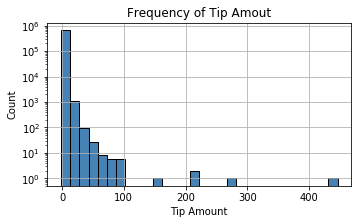

In [53]:
plt.figure(1, figsize=(12, 3))

def plotHistogram(data):
    plt.subplot(121)
    plt.hist(data.tip_amount,
             bins=30,
             log=True,
             color='steelblue',
             edgecolor='k',)
    plt.xlabel('Tip Amount')
    plt.ylabel('Count')
    plt.grid(True)
    plt.title('Frequency of Tip Amout')

plotHistogram(data)

plt.show() 

In [54]:
# data cleaning

from datetime import timedelta
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def clean(data):   
    # remove obs with negative tip amount and total fare amount less than 2.5
    data = data[(data.total_amount>=2.5)]
    
    # remove value with negative value 
    data =  data[(data.tip_amount>=0) & 
                 (data.fare_amount>=0) & 
                 (data.improvement_surcharge>=0) &
                 (data.tolls_amount>=0) & 
                 (data.extra>=0) & 
                 (data.mta_tax>=0)]
    
    # encoding
    print(data.select_dtypes(include=['O']).columns)
    data['Store_and_fwd_flag'] = np.where((data.store_and_fwd_flag=='Y'),1,0)
    
    # missing detect
    #print(data.isnull().sum())
    
    # drop column of NAs
    data = data.drop(columns=['ehail_fee'],axis=1)
    
    return(data)


data_clean = clean(data)
data_clean.head()

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag'], dtype='object')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,Store_and_fwd_flag
0,2,2018-08-01 00:03:22,2018-08-01 00:17:59,N,1,255,49,1,3.54,13.5,0.5,0.5,2.96,0.0,0.3,17.76,1,1,0
1,2,2018-08-01 00:37:08,2018-08-01 00:46:53,N,1,256,112,1,1.94,8.5,0.5,0.5,1.96,0.0,0.3,11.76,1,1,0
2,2,2018-08-01 00:12:45,2018-08-01 00:20:21,N,1,146,7,2,1.37,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2,1,0
3,2,2018-08-01 00:21:29,2018-08-01 00:27:41,N,1,7,260,2,1.10,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1,0
4,2,2018-08-01 00:03:24,2018-08-01 00:06:44,N,1,256,256,1,0.56,4.5,0.5,0.5,1.74,0.0,0.3,7.54,1,1,0


In [63]:
# Feature engineering

def features(data):
    
    # create a variable describe Trip time
    data['pickup_time'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['dropoff_time'] = data.lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

    data['trip_time'] = (data['dropoff_time'] - data['pickup_time']) / timedelta(minutes=1)
    
    # week day
    data['pickup_day'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").strftime('%w'))
    
    # create a variable represent average speed
    data['avg_speed'] = round(data.trip_distance/data.trip_time,2)
    data['avg_speed'] = data['avg_speed'].replace([np.inf, -np.inf], np.nan)
    data['avg_speed'].fillna((data['avg_speed'].mean()), inplace=True)

    return(data)    
    
f_data = features(data_clean)
f_data.head()



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Store_and_fwd_flag,tip_percent,tip_percent_dummy,pickup_time,dropoff_time,trip_time,pickup_day,avg_speed,pickup_city,dropoff_city
0,2,2018-08-01 00:03:22,2018-08-01 00:17:59,N,1,255,49,1,3.54,13.5,...,0,16.666667,1,2018-08-01 00:03:22,2018-08-01 00:17:59,14.616667,3,0.24,Others,Others
1,2,2018-08-01 00:37:08,2018-08-01 00:46:53,N,1,256,112,1,1.94,8.5,...,0,16.666667,1,2018-08-01 00:37:08,2018-08-01 00:46:53,9.750000,3,0.20,Others,Others
2,2,2018-08-01 00:12:45,2018-08-01 00:20:21,N,1,146,7,2,1.37,7.0,...,0,0.000000,0,2018-08-01 00:12:45,2018-08-01 00:20:21,7.600000,3,0.18,Others,Others
3,2,2018-08-01 00:21:29,2018-08-01 00:27:41,N,1,7,260,2,1.10,6.5,...,0,0.000000,0,2018-08-01 00:21:29,2018-08-01 00:27:41,6.200000,3,0.18,Others,Others
4,2,2018-08-01 00:03:24,2018-08-01 00:06:44,N,1,256,256,1,0.56,4.5,...,0,23.076923,1,2018-08-01 00:03:24,2018-08-01 00:06:44,3.333333,3,0.17,Others,Others


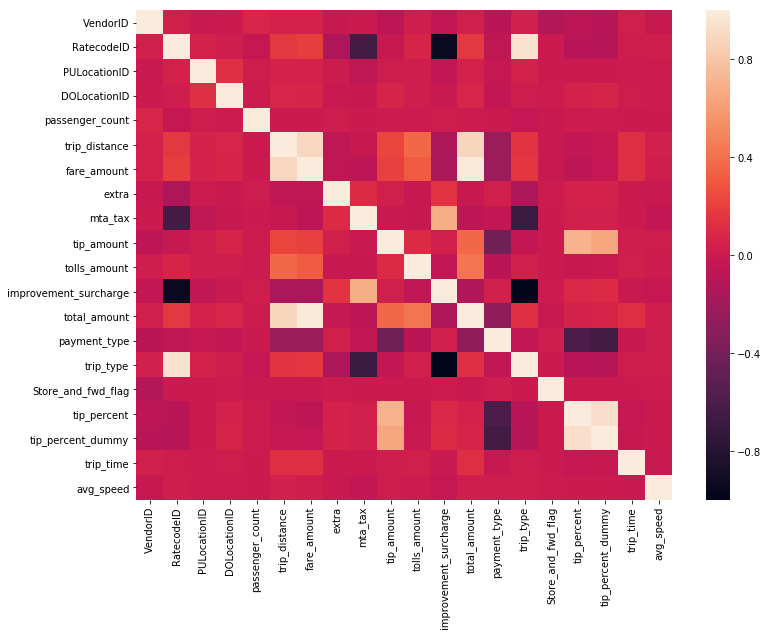

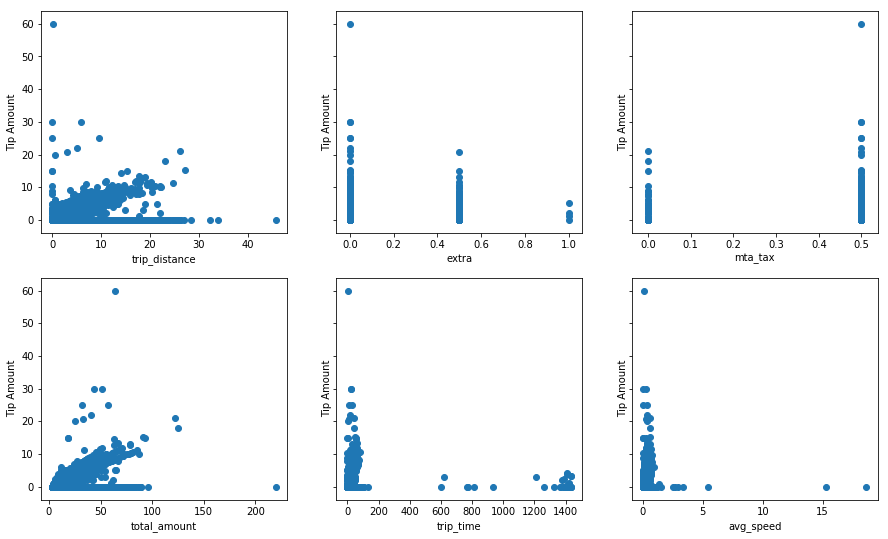

In [65]:
# Heat map
# Scatter plot
def exploratary(data):
    data_clean.corr()
    plt.figure(figsize = (12,9))
    ax=sns.heatmap(data.corr())

    var_list = [['trip_distance','extra', 'mta_tax'],
                ['total_amount','trip_time','avg_speed']]

    data_pattern = data_clean.head(10000)
    fig, ax = plt.subplots(len(var_list),len(var_list[0]),figsize=(15,9),sharey=True)
    for i in range(len(var_list)): 
        for j in range(len(var_list[i])):      
            ax[i,j].scatter(data_pattern[var_list[i][j]], data_pattern['tip_amount'])
            ax[i,j].set_xlabel(var_list[i][j])
            ax[i,j].set_ylabel("Tip Amount")
            
            
exploratary(f_data)

In [73]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import cross_validation, metrics 

import warnings
warnings.filterwarnings('ignore')

data_model = f_data.head(50000)

def randomforest(data):
    
    x = data[['payment_type','total_amount','trip_time','avg_speed',
              'extra', 'tolls_amount','improvement_surcharge','passenger_count',
              ]]
    y = data[['tip_amount']]

    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

    rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=10)
    rf.fit(X_train, y_train.values.ravel())

    predicted_train = rf.predict(X_train)
    predicted_test = rf.predict(X_test)
    test_score = r2_score(y_test, predicted_test)

    print(f'Out-of-bag R2_score estimate: {rf.oob_score_:>5.3}')
    print(f'Test data R2_score: {test_score:>5.3}')
    
    #print("Processing time", dt.datetime.now()-tic)
    return rf.predict(x)
    
y_pred_rf = randomforest(data_model)

Out-of-bag R2_score estimate: 0.766
Test data R2_score: 0.816


In [71]:
f_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Store_and_fwd_flag,tip_percent,tip_percent_dummy,pickup_time,dropoff_time,trip_time,pickup_day,avg_speed,pickup_city,dropoff_city
0,2,2018-08-01 00:03:22,2018-08-01 00:17:59,N,1,255,49,1,3.54,13.5,...,0,16.666667,1,2018-08-01 00:03:22,2018-08-01 00:17:59,14.616667,3,0.24,Others,Others
1,2,2018-08-01 00:37:08,2018-08-01 00:46:53,N,1,256,112,1,1.94,8.5,...,0,16.666667,1,2018-08-01 00:37:08,2018-08-01 00:46:53,9.750000,3,0.20,Others,Others
2,2,2018-08-01 00:12:45,2018-08-01 00:20:21,N,1,146,7,2,1.37,7.0,...,0,0.000000,0,2018-08-01 00:12:45,2018-08-01 00:20:21,7.600000,3,0.18,Others,Others
3,2,2018-08-01 00:21:29,2018-08-01 00:27:41,N,1,7,260,2,1.10,6.5,...,0,0.000000,0,2018-08-01 00:21:29,2018-08-01 00:27:41,6.200000,3,0.18,Others,Others
4,2,2018-08-01 00:03:24,2018-08-01 00:06:44,N,1,256,256,1,0.56,4.5,...,0,23.076923,1,2018-08-01 00:03:24,2018-08-01 00:06:44,3.333333,3,0.17,Others,Others
